In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/datathon-2024/sample_submission.csv
/kaggle/input/datathon-2024/test_x.csv
/kaggle/input/datathon-2024/train.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/datathon-2024/train.csv")
test_df = pd.read_csv('/kaggle/input/datathon-2024/test_x.csv')

/tmp/ipykernel_17/4096352259.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/kaggle/input/datathon-2024/train.csv")


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

Eğer bir kolonun büyük bir kısmı (örneğin, %50 veya daha fazlası) eksikse, bu kolonu modellemede kullanmak problemli olabilir. Bu durumda, bu kolonu silmek düşünülebilir

In [4]:
# Her bir kolondaki eksik veri sayısını ve oranını hesaplar
missing_data = train_df.isnull().sum()

# Eksik veri oranını yüzdelik olarak hesaplar
missing_percentage = (missing_data / len(train_df)) * 100

# Eksik veri oranlarını bir DataFrame olarak gösterir
missing_df = pd.DataFrame({
    'Eksik Veri Sayısı': missing_data,
    'Eksik Veri Oranı (%)': missing_percentage
})

# Eksik veri oranına göre sıralar ve gösterir
missing_df = missing_df[missing_df['Eksik Veri Sayısı'] > 0].sort_values(by='Eksik Veri Oranı (%)', ascending=False)

print(missing_df)


                                                    Eksik Veri Sayısı  \
Daha Önceden Mezun Olunduysa, Mezun Olunan Üniv...              64706   
Lise Bolum Diger                                                63599   
Lise Adi Diger                                                  60392   
Girisimcilikle Ilgili Deneyiminizi Aciklayabili...              50526   
Hangi STK'nin Uyesisiniz?                                       49518   
Uye Oldugunuz Kulubun Ismi                                      48691   
Baska Kurumdan Aldigi Burs Miktari                              44162   
Burs Aldigi Baska Kurum                                         43977   
Burslu ise Burs Yuzdesi                                         42685   
Daha Once Baska Bir Universiteden Mezun Olmus                   37345   
Ingilizce Seviyeniz?                                            36533   
Anne Sektor                                                     34537   
Spor Dalindaki Rolunuz Nedir?                      

In [5]:
# Her bir kolondaki eksik veri oranını hesaplar
missing_percentage = train_df.isnull().sum() / len(train_df) * 100

# %50'den fazla eksik verisi olan sütunları belirler
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Bu sütunları veri setinden siler
train_df.drop(columns=columns_to_drop, inplace=True)

# Silinen sütunları görüntüler
print(f"Silinen sütunlar: {columns_to_drop.tolist()}")


Silinen sütunlar: ['Burslu ise Burs Yuzdesi', 'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi Diger', 'Lise Bolum Diger', 'Burs Aldigi Baska Kurum', 'Baska Kurumdan Aldigi Burs Miktari', 'Anne Sektor', 'Uye Oldugunuz Kulubun Ismi', "Hangi STK'nin Uyesisiniz?", 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?', 'Ingilizce Seviyeniz?', 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']


In [6]:
train_df = train_df.drop('Dogum Yeri', axis=1)
train_df = train_df.drop('Ikametgah Sehri', axis=1)


**NÜMERİK VERİLERİN DAĞILIMINI ANLAMA**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


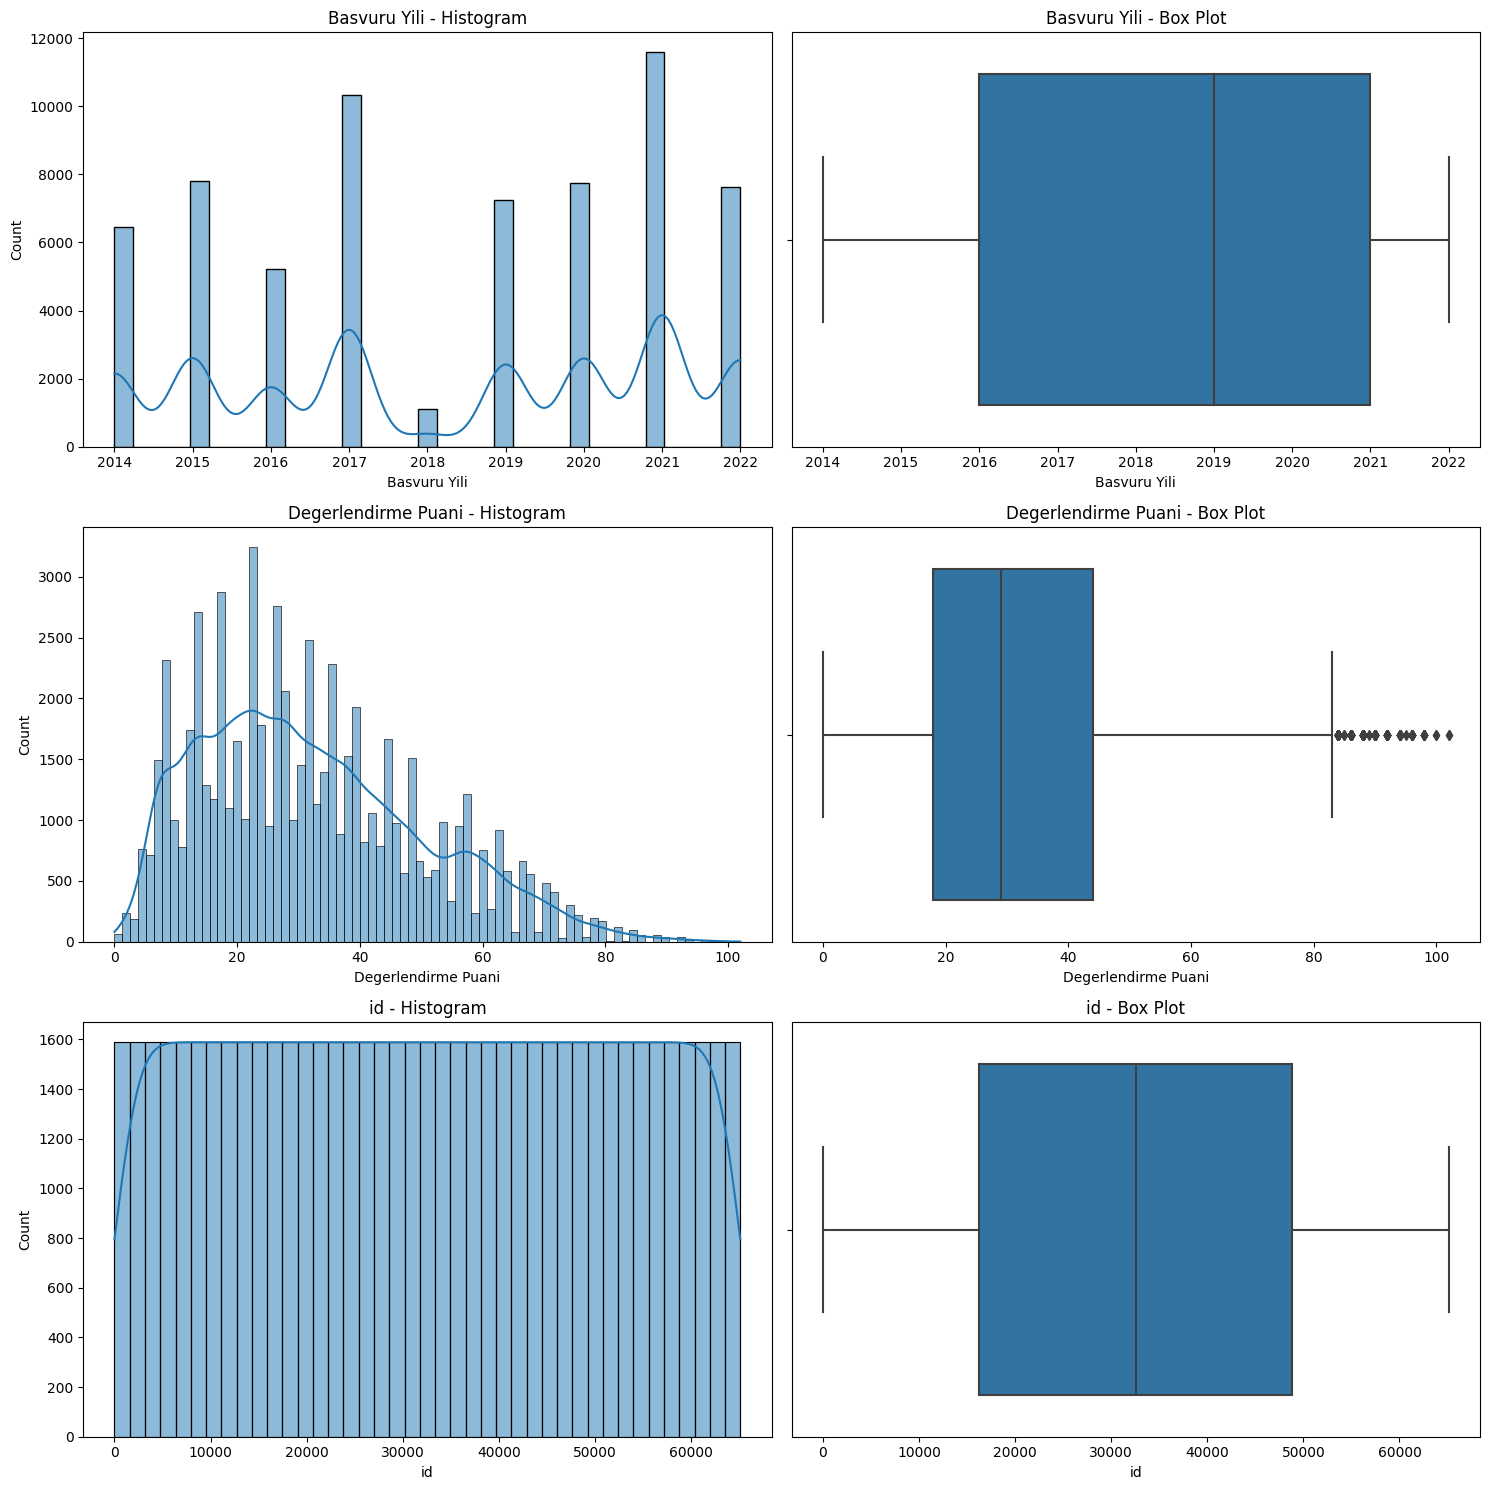

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tüm numerik değişkenleri seçin
numerik_degiskenler = train_df.select_dtypes(include=['float64', 'int64']).columns

# Histogram ve Kutu Grafiği (Box Plot) çizimi
plt.figure(figsize=(15, len(numerik_degiskenler) * 5))

for i, column in enumerate(numerik_degiskenler):
    plt.subplot(len(numerik_degiskenler), 2, 2*i + 1)
    sns.histplot(train_df[column].dropna(), kde=True)
    plt.title(f'{column} - Histogram')

    plt.subplot(len(numerik_degiskenler), 2, 2*i + 2)
    sns.boxplot(x=train_df[column])
    plt.title(f'{column} - Box Plot')

plt.tight_layout()
plt.show()


Başvuru yılında uç değer olmadığı için ortalamayla doldurduk

In [8]:
train_df['Basvuru Yili'] = train_df['Basvuru Yili'].fillna(train_df['Basvuru Yili'].mean())

**KATEGORİK DEĞİŞKENLERİN DÜZENLENMESİ**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Basvuru Yili                                          65125 non-null  int64  
 1   Degerlendirme Puani                                   65124 non-null  float64
 2   Cinsiyet                                              64956 non-null  object 
 3   Dogum Tarihi                                          64948 non-null  object 
 4   Universite Adi                                        64993 non-null  object 
 5   Universite Turu                                       64870 non-null  object 
 6   Burs Aliyor mu?                                       65125 non-null  object 
 7   Bölüm                                                 64894 non-null  object 
 8   Universite Kacinci Sinif                              64

In [10]:
# Tüm veri çerçevesindeki metin verilerini küçük harfe dönüştürme
train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


/tmp/ipykernel_17/4043184512.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [11]:
train_df['Cinsiyet'].fillna(train_df['Cinsiyet'].mode()[0])

0        erkek
1        erkek
2        erkek
3        erkek
4        erkek
         ...  
65120    erkek
65121    erkek
65122    erkek
65123    erkek
65124    kadın
Name: Cinsiyet, Length: 65125, dtype: object

doğum tarihini tek tip formata çevirme

In [12]:
import pandas as pd
from dateutil import parser

def extract_year(date_str):
    if isinstance(date_str, str):
        try:
            # Tarihi parse et ve sadece yıl bilgisini al
            date = parser.parse(date_str, fuzzy=True, dayfirst=True)
            return date.year
        except (ValueError, TypeError):
            return None
    return None

# Örnek veri

# Sadece yıl bilgisini çıkarma
train_df['Dogum Tarihi'] = train_df['Dogum Tarihi'].apply(extract_year)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Basvuru Yili                                          65125 non-null  int64  
 1   Degerlendirme Puani                                   65124 non-null  float64
 2   Cinsiyet                                              64956 non-null  object 
 3   Dogum Tarihi                                          63306 non-null  float64
 4   Universite Adi                                        64993 non-null  object 
 5   Universite Turu                                       64870 non-null  object 
 6   Burs Aliyor mu?                                       65125 non-null  object 
 7   Bölüm                                                 64894 non-null  object 
 8   Universite Kacinci Sinif                              64

In [14]:
train_df['Dogum Tarihi'] = train_df['Dogum Tarihi'].fillna(train_df['Dogum Tarihi'].mean())

In [15]:
train_df.describe()

,Basvuru Yili,Degerlendirme Puani,Dogum Tarihi,id
count,65125.000000,65124.000000,65125.000000,65125.000000
mean,2018.277298,32.086466,1999.136685,32562.000000
std,2.669979,18.139239,91.844595,18800.112478
min,2014.000000,0.000000,194.000000,0.000000
25%,2016.000000,18.000000,1995.000000,16281.000000
50%,2019.000000,29.000000,1998.000000,32562.000000
75%,2021.000000,44.000000,2000.000000,48843.000000
max,2022.000000,102.000000,9951.000000,65124.000000


In [16]:
df=train_df

In [17]:
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [18]:
df.isnull().sum()

Basvuru Yili                                            0
Degerlendirme Puani                                     1
Cinsiyet                                                0
Dogum Tarihi                                            0
Universite Adi                                          0
Universite Turu                                         0
Burs Aliyor mu?                                         0
Bölüm                                                   0
Universite Kacinci Sinif                                0
Universite Not Ortalamasi                               0
Lise Adi                                                0
Lise Sehir                                              0
Lise Turu                                               0
Lise Bolumu                                             0
Lise Mezuniyet Notu                                     0
Baska Bir Kurumdan Burs Aliyor mu?                      0
Anne Egitim Durumu                                      0
Anne Calisma D

In [19]:
for column in df.columns:
    unique_values = df[column].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Degerlendirme Puani"])  # Özellikler
y = df["Degerlendirme Puani"]  # Hedef değişken

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model seçimi ve eiğtimi

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

model değerlendirme

In [22]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Validation MSE: {mse}")


Validation MSE: 361.4241160998081


In [23]:
test_x = pd.read_csv("/kaggle/input/datathon-2024/test_x.csv")
test_x.drop(columns=columns_to_drop, inplace=True)
test_x = test_x.drop('Dogum Yeri', axis=1)
test_x = test_x.drop('Ikametgah Sehri', axis=1)
test_x['Basvuru Yili'] = test_x['Basvuru Yili'].fillna(test_x['Basvuru Yili'].mean())
test_x = test_x.applymap(lambda x: x.lower() if isinstance(x, str) else x)
test_x['Cinsiyet'].fillna(test_x['Cinsiyet'].mode()[0])
test_x['Dogum Tarihi'] = test_x['Dogum Tarihi'].apply(extract_year)
test_x['Dogum Tarihi'] = test_x['Dogum Tarihi'].fillna(test_x['Dogum Tarihi'].mean())
for column in test_x.select_dtypes(include=['object']).columns:
    mode_value = test_x[column].mode()[0]
    df[column] = test_x[column].fillna(mode_value)
for column in test_x.columns:
    unique_values = test_x[column].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    test_x[column] = test_x[column].map(mapping)


/tmp/ipykernel_17/1676010668.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_x = test_x.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [24]:
test_predictions = model.predict(test_x)

In [25]:
submission = pd.DataFrame({
    "id": test_x["id"],
    "Degerlendirme Puani": test_predictions
})
submission.to_csv("submission.csv", index=False)
